<a href="https://colab.research.google.com/github/GEOFFREY-MO/My-data/blob/main/mokamigeoffreyfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AFRICAN DATA SCHOOL**

**WEBTRAFFIC FORECASTING USING DEEP LEARNING**

**MOKAMI GEOFFREY KEGOCHA**

**PROJECT DOCUMENTATION SUBMITTED TO DEXVIRTUAL**

**OF DATA SCIENCE IN PARTIAL FULFILLMENT OF THE REQUIREMENTS**
 
**FOR THE AWARD OF THE CERTIFICATE AT** 
 
**AFRICAN DATA SCHOOL**

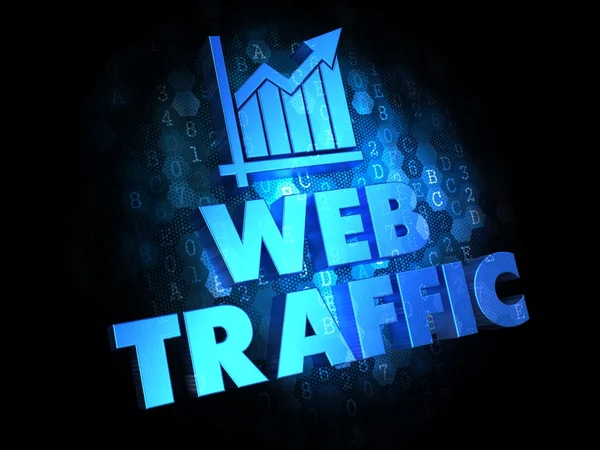

**MARCH 2023**







**WEBTRAFFIC** Is the total number of wedsite users in a particular period of time. Now in this project we are going to carry out aprediction towards the future webtraffic. This may also assist the website investors to visualize the future predictions.

 Due to high growth of technology one  may need a  predicted data to guide them to manange there tasks to there daily needs and intensions.

**NB:** The dataset that I am going to train is for educational purpose since I created it by my self. 


Now lets upload the data for cleaning  and make it useful for our project.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data= pd.read_csv('webtrafic.csv')
data.head(10)

,index_hour,visits
0,0,7844913
1,1,1434280
2,2,10551914
3,3,14734835
4,4,17984251
5,5,3263730
6,6,5162529
7,7,14598741
8,8,2483802
9,9,8618196


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index_hour  1154 non-null   int64
 1   visits      1154 non-null   int64
dtypes: int64(2)
memory usage: 18.2 KB


In [ ]:
data.isnull()

,index_hour,visits
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1149,False,False
1150,False,False
1151,False,False
1152,False,False


In [ ]:
data.shape

(1154, 2)

In [ ]:
data.describe()

,index_hour,visits
count,1154.000000,1.154000e+03
mean,576.500000,1.057683e+07
std,333.275412,5.497713e+06
min,0.000000,1.017529e+06
25%,288.250000,5.895858e+06
50%,576.500000,1.066855e+07
75%,864.750000,1.524076e+07
max,1153.000000,1.999279e+07


**DATA EXPLORATION FOR WEBTRSFFIC FORECSTING**


Now we are going to explore the the data for easy forecasting interms of graphs


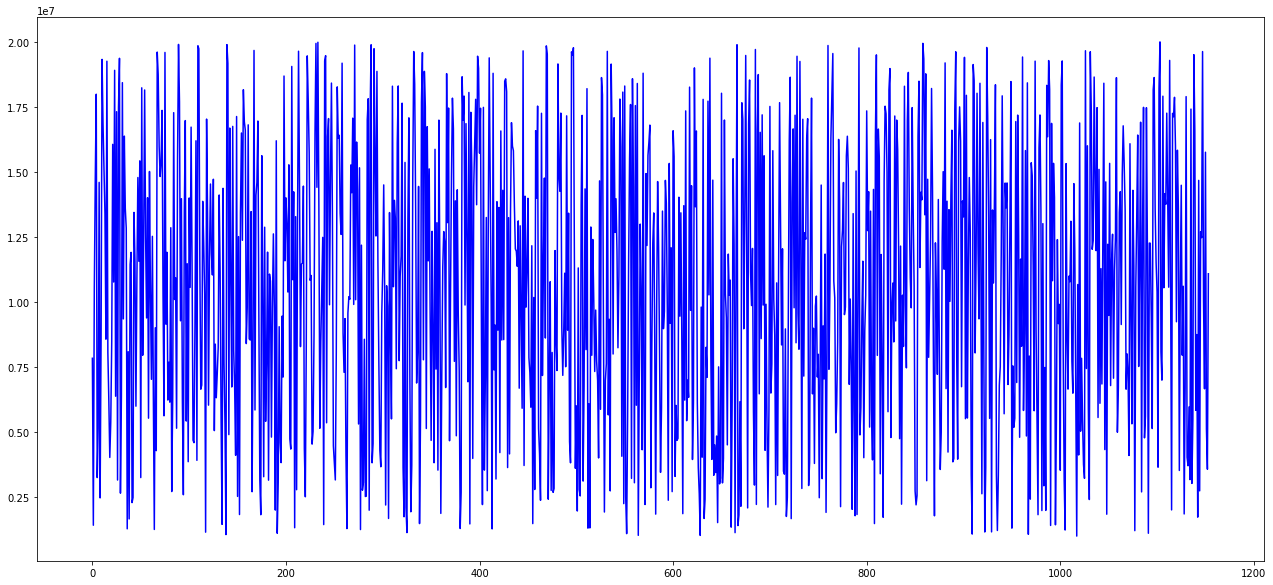

In [ ]:

import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('webtrafic.csv')

# Extract the 2D data from the appropriate columns
sessions_2d = data[['visits']].values

# Flatten the 2D data into a 1D array
sessions_1d = sessions_2d.flatten()

# Create a new array with the same length as sessions_1d
ar = np.arange(len(sessions_1d))

# Plot the data
plt.figure(figsize=(22,10))
plt.plot(ar, sessions_1d, 'b')
plt.show()


As you can see the graph some visits are much closer to each other and some

 pattern appear to be repeating them selves for us to  observe the graph keenly
 
  we need to plot part of the graph so that we can see it clearly

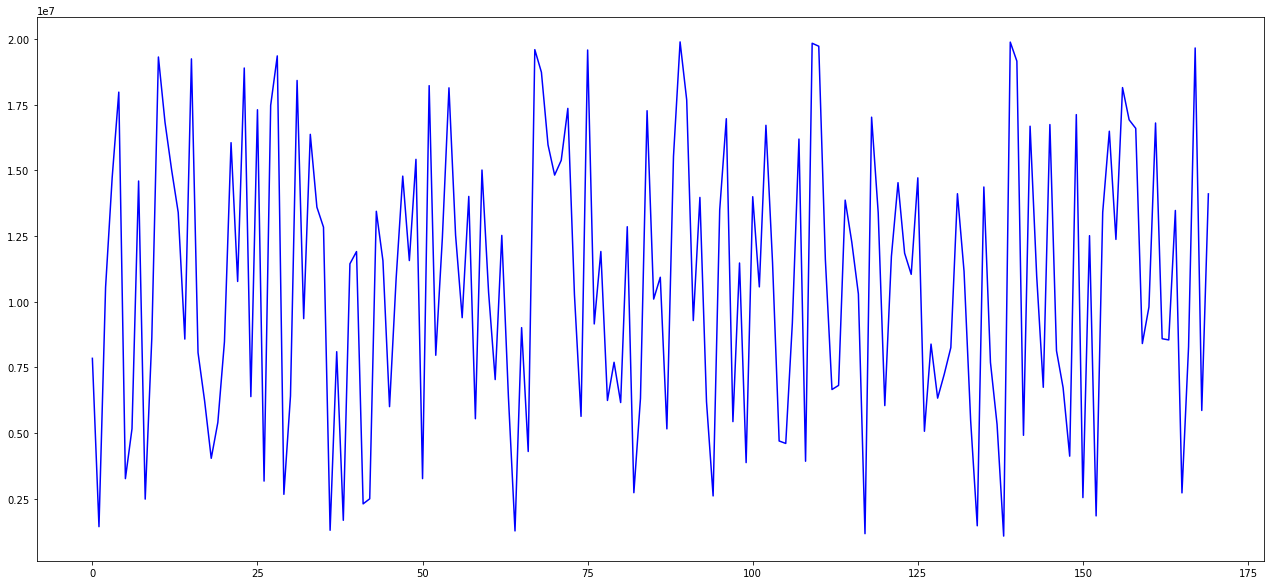

In [ ]:
sample = sessions_1d[:170]
ar= np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar,sample,'b')
plt.show()

Now it more clearly as you see there is a repeating pattern of volume of webtraffic which approximately happens onece in 24 hours. Now lets go ahead and explore the data more.


**LET US NOW PREPARE DATA FOR WEB FORCASTING**

In [ ]:
def prepare_data(seq,num):
  y= []
  x= []
  for i in range(0,(len(seq)-num),1):
    input = seq[i:i+num]
    output = seq[i+num]

    x.append(input)
    y.append(output)

  return np.array(x),np.array(y)
  #we need to prepare just for 1 week that is 168 hours
num = 168
x,y = prepare_data(sessions_1d,num)
print(len(x))
                 


986


**SPLITTING THE DATA SEQUENCIALLY**

Here we are going to spilt the data sequencialy because we need that uniformity

 in time series. We will try to avoid random splitting of data in training and validation of x and y values when dealing with time series especially in webtraffic

In [ ]:
# let use the ratio of 90 to 10
ind = int(0.9*len(x))
x_tr = x[:ind]
y_tr = y[:ind]

x_val = x[ind:]
y_val = y[ind:]

# let now normalize the data and do some scaling

from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val = x_scaler.fit_transform(x_val)

# Reshape y_tr to a 2D array
y_tr = y_tr.reshape(-1, 1)

 #now let us normalize the output

# Scale y_tr and y_val using StandardScaler
y_scaler = StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)[:, 0]
y_val = y_scaler.transform(y_val.reshape(-1, 1))[:, 0]

# print the shapes of x_tr and x_val before reshaping
print('x_tr shape:', x_tr.shape)
print('x_val shape:', x_val.shape)

#reshape the input
x_tr = x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
#x_val =x_val.reshape(x_tr.shape[0],x_val.shape[1],1)




# resize x_val to have the same number of samples as x_tr
x_val_resized = np.resize(x_val, (887, 168))

# reshape the input
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1], 1)
x_val_resized = x_val_resized.reshape(x_val_resized.shape[0], x_val_resized.shape[1], 1)

print(x_tr)

x_tr shape: (887, 168)
x_val shape: (99, 168)
[[[-4.89293258e-01]
  [-1.65938133e+00]
  [-7.72077572e-05]
  ...
  [-1.40139793e+00]
  [-4.01858477e-01]
  [ 1.64642163e+00]]

 [[-1.65826681e+00]
  [ 3.04091225e-03]
  [ 7.63258788e-01]
  ...
  [-4.00687801e-01]
  [ 1.64697595e+00]
  [-8.39129336e-01]]

 [[ 4.32610537e-03]
  [ 7.65714748e-01]
  [ 1.35624063e+00]
  ...
  [ 1.64639261e+00]
  [-8.38400145e-01]
  [ 6.45940705e-01]]

 ...

 [[-1.14602814e+00]
  [ 5.49925028e-01]
  [-9.51613250e-02]
  ...
  [ 3.07639468e-01]
  [-1.84895724e-01]
  [ 8.65719970e-01]]

 [[ 5.51266369e-01]
  [-9.19607237e-02]
  [ 6.46487344e-01]
  ...
  [-1.83910791e-01]
  [ 8.66329217e-01]
  [-6.70282196e-01]]

 [[-9.06852842e-02]
  [ 6.49044597e-01]
  [ 1.10417148e+00]
  ...
  [ 8.66414193e-01]
  [-6.69564883e-01]
  [ 1.91911981e-01]]]


In [ ]:
# reshape the input
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1, 1)

# print the shapes of x_tr and x_val after reshaping
print('x_tr shape after reshaping:', x_tr.shape)



x_tr shape after reshaping: (887, 168, 1)


**MODEL BUILDING FOR WEBTRAFFIC FORECASTING**

We will apply LongShortTermMemory(LSTM)

since we are dealing with timeseries dataset.

In [ ]:
from keras.models import*
from keras.layers import*
from keras.callbacks import*
from tensorflow import keras

#define model
model = Sequential()
model.add(LSTM(128,input_shape=(168,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the optimizer and loss
model.compile(loss='mse',optimizer='adam')
#Define the callback to save the best model during the training
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss',
        verbose=1, save_best_only=True, mode='min')
# Train the model for 30 epochs with batch size of 32:
history=model.fit(x_tr, y_tr ,epochs=30, batch_size=32, 
           validation_data=(x_val,y_val), callbacks=[mc])

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 1.0057
Epoch 1: val_loss improved from inf to 0.91807, saving model to best_model.hdf5
28/28 [==============================] - 11s 283ms/step - loss: 1.0057 - val_loss: 0.9181
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 1.0007
Epoch 2: val_loss improved from 0.91807 to 0.91603, saving model to best_model.hdf5
28/28 [==============================] - 6s 229ms/step - loss: 1.0007 - val_loss: 0.9160
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.9985
Epoch 3: val_loss did not improve from 0.91603
28/28 [==============================] - 7s 265ms/step - loss: 0.9985 - val_loss: 0.9246
Epoch 4/30
28/28 [==============================] - ETA: 0s - loss: 0.9979
Epoch 4: val_loss did not improve from 0.91603
28/28 [==============================] - 6s 207ms/step - loss: 0.9979 - val_loss: 0.9273
Epoch 5/30
28/28 [==============================] - ETA: 0s - loss: 1.0063
Epoch 5: v

Lets now evaluate the model using the mean squared error

In [ ]:
model.load_weights('best_model.hdf5')

mse = model.evaluate(x_val,y_val)
print('the mean square error = ',mse)

4/4 [==============================] - 0s 59ms/step - loss: 0.9131
the mean square error =  0.9131166338920593


**BASELINE MODEL WITH FORECASTING**

In this project we are supposed to use baseline model so theat we can see how good our model is.

Let now buil a simple moving average model

In [ ]:
def compute_moving_average(data):
  pred =[]
  for i in data:
    avg=np.sum(i)/len(i)
    pred.append(avg)
  return np.array(pred)
#reshape the data
x_reshaped = x_val.reshape(-1,168)

# let now make predictions
y_pred = compute_moving_average(x_reshaped)

#evaluation of validation data
mse = np.sum((y_val-y_pred)**2/len(y_val))

print('mean square error= ',mse)

mean square error=  0.9210566930418356


**WEBTRAFFIC FORECASTIN PROCESS NOW IS BEGING FROM HERE**


1/1 [==============================] - 0s 32ms/step


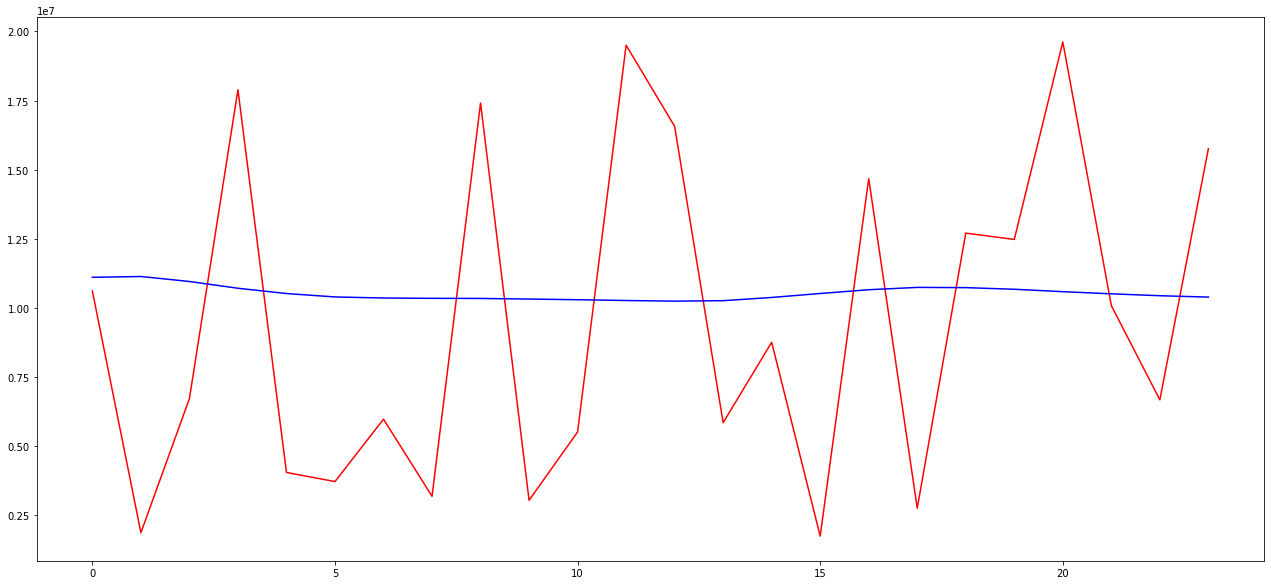

In [ ]:
def forecast(x_val,number_of_pred,ind):
  predictions=[]

  temp =x_val[ind]

  for i in range(number_of_pred):

# prediction for the next hour
    pred=model.predict(temp.reshape(1,-1,1))[0][0]
    #append the predictions as the last element of array
    temp = np.insert(temp,len(temp),pred)
    predictions.append(pred)
    #ignore the last element
    temp = temp[1:]
  return predictions

number_of_pred =24
ind=72
y_pred= forecast(x_val,number_of_pred,ind)
y_true = y_val[ind:ind+(number_of_pred)]
# Lets convert back the normalized values to the original dimensional space
y_true = y_true.reshape(-1, 1)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)


y_true= y_scaler.inverse_transform(y_true)
y_pred= y_scaler.inverse_transform(y_pred)

def plot(y_true,y_pred):
  ar = npange(len(y_true))
  plt.figure(figsize=(22,10))
  plt.plot(ar, y_true,'r')
  plt.plot(ar, y_pred,'b')
  plt.show()
plot(y_true,y_pred)

**CNN Model with Forecasting**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
model= Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu',input_shape=(num,1)))
model.add(Conv1D(32, 5, padding='same', activation='relu',input_shape=(num,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 168, 32)           10272     
                                                                 
 flatten (Flatten)           (None, 5376)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                344128    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 354,721
Trainable params: 354,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the optimizer and loss:
model.compile(loss='mse',optimizer='adam')
# Define the callback to save the best model during the training
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1,
         save_best_only=True, mode='min')
# Train the model for 30 epochs with batch size of 32:
history=model.fit(x_tr, y_tr ,epochs=30, batch_size=32, validation_data=(x_val,y_val),
            callbacks=[mc])

Epoch 1/30
26/28 [==========================>...] - ETA: 0s - loss: 1.0278
Epoch 1: val_loss improved from inf to 0.95380, saving model to best_model.hdf5
28/28 [==============================] - 2s 37ms/step - loss: 1.0191 - val_loss: 0.9538
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.9119
Epoch 2: val_loss did not improve from 0.95380
28/28 [==============================] - 1s 28ms/step - loss: 0.9119 - val_loss: 1.1344
Epoch 3/30
27/28 [===========================>..] - ETA: 0s - loss: 0.7790
Epoch 3: val_loss did not improve from 0.95380
28/28 [==============================] - 1s 28ms/step - loss: 0.7770 - val_loss: 1.0469
Epoch 4/30
27/28 [===========================>..] - ETA: 0s - loss: 0.5808
Epoch 4: val_loss did not improve from 0.95380
28/28 [==============================] - 1s 28ms/step - loss: 0.5750 - val_loss: 1.1201
Epoch 5/30
28/28 [==============================] - ETA: 0s - loss: 0.3603
Epoch 5: val_loss did not improve from 0.95380
28/28

In [ ]:
model.load_weights('best_model.hdf5')

In [ ]:
mse = model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)

4/4 [==============================] - 0s 7ms/step - loss: 0.9538
Mean Square Error: 0.9538008570671082


**Comparison with the baseline model
Now here let’s compare this performance with the baseline model above.**

In [ ]:
#build a simple model
def compute_moving_average(data):
  pred=[]
  for i in data:
    avg=np.sum(i)/len(i)
    pred.append(avg)
  return np.array(pred)
x_reshaped = x_val.reshape(-1,168)
y_pred = compute_moving_average(x_reshaped)
mse = np.sum ( (y_val - y_pred) **2 ) / (len(y_val))
print("Mean Square Error:",mse)

Mean Square Error: 0.9210566930418356


**Finally let now do Forecasting and see how well it can forecast for a 1 day that is in 24 hours of the day.**

In [ ]:
def forecast(x_val, no_of_pred, ind):
  predictions=[]
  #intialize the array with previous weeks data  
  temp=x_val[ind]
  for i in range(no_of_pred):
    #predict for the next hour
    pred=model.predict(temp.reshape(1,-1,1))[0][0]
    
    #append the prediction as the last element of array
    temp = np.insert(temp,len(temp),pred)
    predictions.append(pred)
    #ignore the first element of array
    temp = temp[1:]
  return predictions
#this predioction will only take part in the previuos week
no_of_pred =24
ind=72
y_pred= forecast(x_val,no_of_pred,ind)
y_true = y_val[ind:ind+(no_of_pred)]


y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)

y_true = np.array(y_true)
y_true = y_true.reshape(-1,1)



1/1 [==============================] - 0s 38ms/step


In [ ]:
def plot_forecast(y_true, y_pred):
    ar = np.arange(len(y_true))
    plt.figure(figsize=(12,6))
    plt.plot(ar, y_true, label='True Values')
    plt.plot(ar, y_pred, label='Predicted Values')
    plt.legend()
    plt.show()


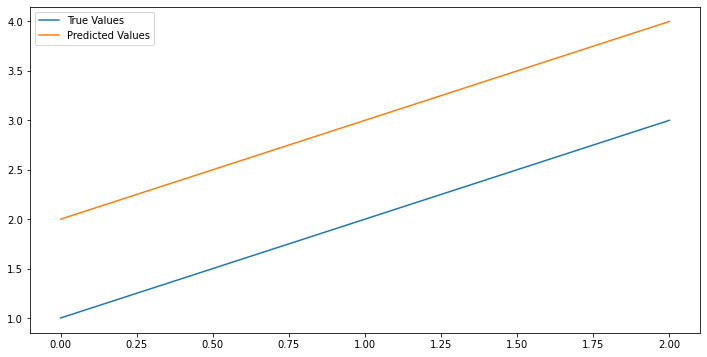

In [ ]:
plot_forecast(y_true, y_pred)


this is kind of results are happenning because the dataframe was made randomly for educational purpose and for me to use it in my final project since I never wanted to copy and paste someones code but instead doing my own project based to the knowledge I received from the classes.

**Conclussion**


In conclusion this is not the end of this CNN model since it  is lenghty, I will try to improve it to work with real dataframe different from this one for a realy life situation.


